# Programming for Data Analysis
## Project 1 
## Title: IQ Test 
### Author: Andras Csullog

![IQ](https://www.arealme.com/newimg/tn_@2x_iq-2019.png)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
iq = np.random.normal(100 , 15 , 1000)
parentsiq =  random.choices(iq, weights=iq, k=1000)

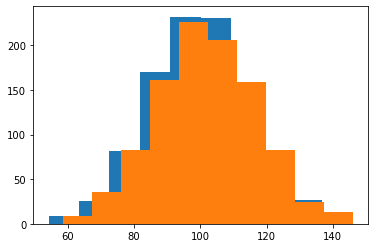

In [4]:
plt.hist(iq)
plt.hist(parentsiq)
plt.show()

In [5]:
gender = ["male", "female"]

In [6]:
gen = random.choices(gender, weights = [500, 500], k = 1000)

In [7]:
doby = np.random.randint(1900, 2000, 1000)

In [8]:
import pandas as pd
df = pd.DataFrame({"IQ_Score" : iq, "Parents' IQ_Score" : parentsiq, "Gender" : gen,"DOB_Year" : doby})
print(df)

       IQ_Score  Parents' IQ_Score  Gender  DOB_Year
0    109.154376         108.686062  female      1996
1     94.556021         101.641712    male      1979
2     85.042108         128.792917    male      1976
3     97.417708         108.452286  female      1997
4     89.407536         108.479365  female      1978
..          ...                ...     ...       ...
995  107.073852         100.002681    male      1971
996  103.800905          95.129316  female      1914
997  136.085695         100.763422    male      1959
998  111.304141          85.648338  female      1999
999  111.961466         116.791198    male      1906

[1000 rows x 4 columns]
